
# Material to add to webpages

In [1]:
%load_ext autoreload
%autoreload 2

## Synthetic data (Exponenntial growth)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


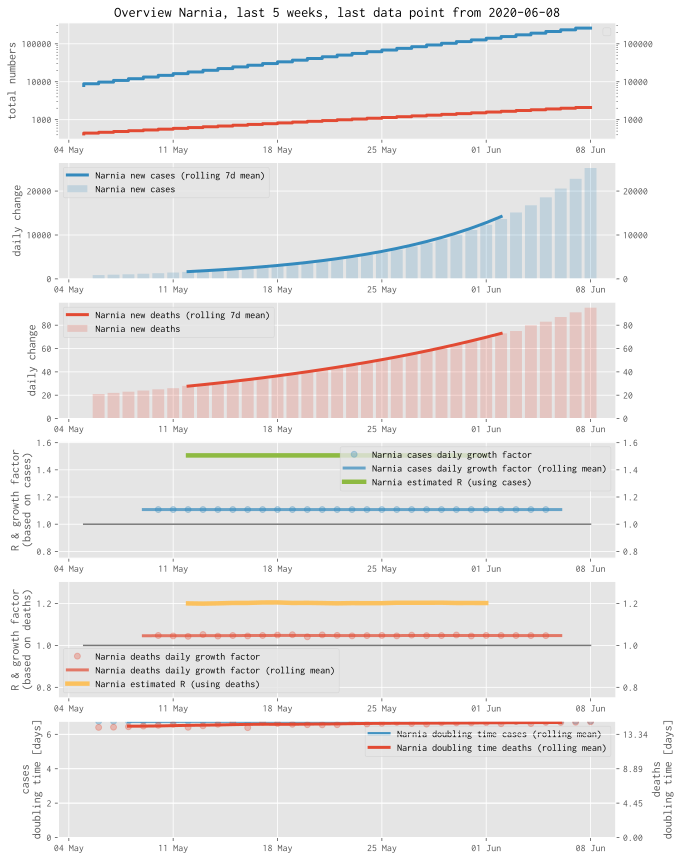

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import numpy as np
import pandas as pd
import oscovida as ov

days = 100
n0 = 1   # initial infections
R = 1.5
tau = 4
dates = pd.date_range("2020-03-01", periods=days, freq='D')
t = np.linspace(0, days, days)
cases = pd.Series(n0*R**(t/tau), index=dates).cumsum()


data1 = cases #.astype(int)  # don't have to be integers
Rdeath = 1.2
deaths = pd.Series(n0*Rdeath**(t/tau), index=dates).cumsum()

data2 = deaths.astype(int)   # don't have to be integers

c = pd.Series(data1, index=pd.DatetimeIndex(dates))
d = pd.Series(data2, index=pd.DatetimeIndex(dates))

ax, _, _ = ov.overview(country="Narnia", weeks=5, data=(c,d));
#ax[1].set_ylim(top=310, bottom=)

## Plotting reproduction number with optional smoothing

In [3]:
cases, deaths = ov.get_country_data("Germany")

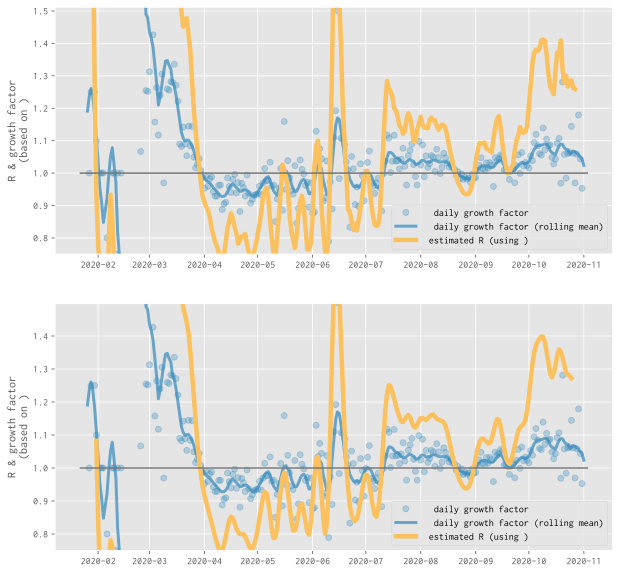

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ov.plot_reproduction_number(ax[0], cases)
ov.plot_reproduction_number(ax[1], cases, smoothing=5)

## Different ways of computing R (with RKI and JHU data) for Germany

In [5]:
germany = ov.fetch_data_germany()

In [6]:
g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
g2.index.name = 'date'
g3 = g2.groupby('date').agg('sum')
cases_rki_mel = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths_rki_mel = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()


In [7]:
R = ov.compute_R(cases_rki_mel.diff()) #

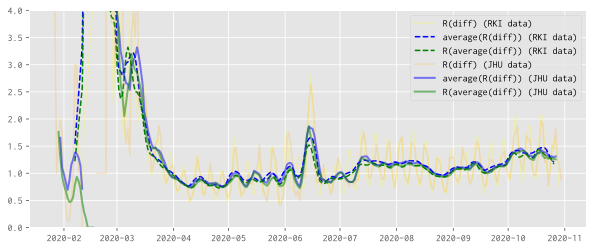

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4))

R = ov.compute_R(cases_rki_mel.diff()) 
ax.plot(R.index, R.values, label="R(diff) (RKI data)", alpha=0.2, color="yellow")
R = R.rolling(7, center=True).mean()
ax.plot(R.index, R.values, "--", label="average(R(diff)) (RKI data)", color="blue")
ax.set_ylim([0, 4])
R2 = ov.compute_R(cases_rki_mel.diff().rolling(7, center=True).mean()) 
ax.plot(R2.index, R2.values, "--", label="R(average(diff)) (RKI data)", color="green")
ax.legend()


R_jhu = ov.compute_R(cases.diff()) 
ax.plot(R_jhu.index, R_jhu.values, label="R(diff) (JHU data)", alpha=0.2, color="orange")
R_jhu = R_jhu.rolling(7, center=True).mean()
ax.plot(R_jhu.index, R_jhu.values, label="average(R(diff)) (JHU data)", color="blue", alpha=0.5, linewidth=2)
ax.set_ylim([0, 4])
R2_jhu = ov.compute_R(cases.diff().rolling(7, center=True).mean()) 
ax.plot(R2_jhu.index, R2_jhu.values, label="R(average(diff)) (JHU data)", color="green", alpha=0.5, linewidth=2)
ax.legend()

# ax.set_ylim([0.9, 1.5])


In [9]:
ov.plot_reproduction_number(ax, cases, smoothing=5)


In [10]:
cases, deaths = ov.get_country_data("Germany")

# Overview plot Germany with RKI data

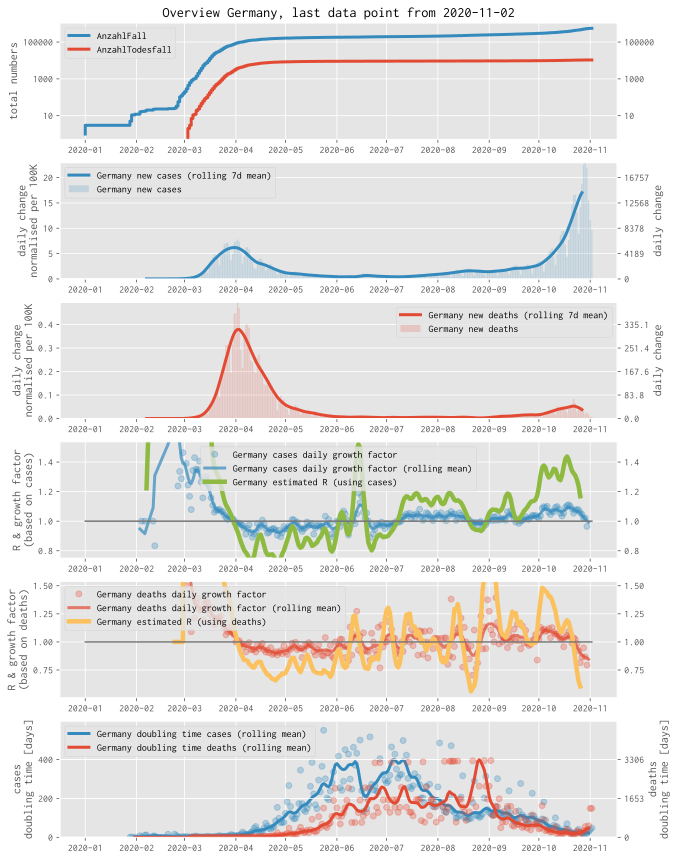

In [11]:
ov.overview(country="Germany", data=(cases_rki_mel, deaths_rki_mel));

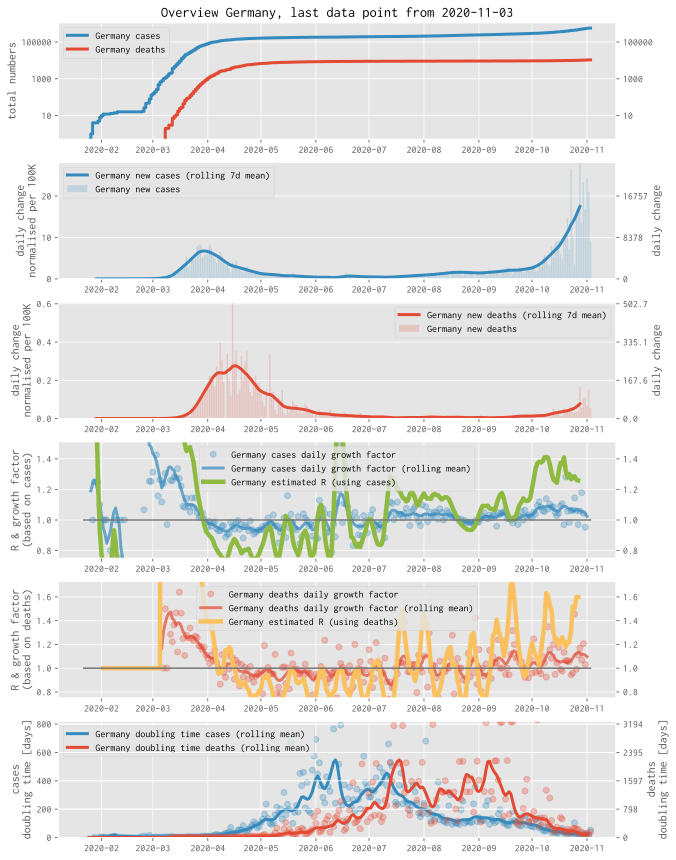

In [12]:
## And with JHU data
ov.overview(country="Germany");